**Importe as libs necessárias: pandas, seaborn, numpy, matplotlib**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**leia os dados de carros do seaborn:  car_crashes**

In [2]:
df = sns.load_dataset('car_crashes')

**Veja as informações da tabela:**
- Base contém valores nulos?
- Qual o dtype das variáveis?
- Qual a distribuição de variáveis numéricas?

In [7]:
# df.isnull()
df.isna().sum().any()

False

In [8]:
df.dtypes

total             float64
speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
abbrev             object
dtype: object

In [9]:
df.select_dtypes(exclude='object')

In [9]:
df_num = df.select_dtypes(include='float')

In [11]:
df_num.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')

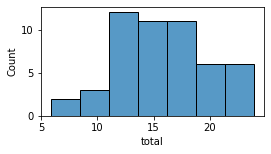

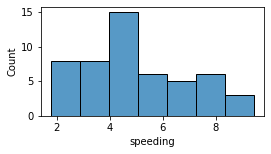

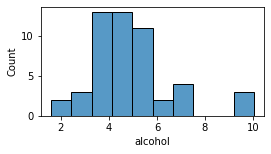

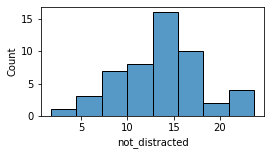

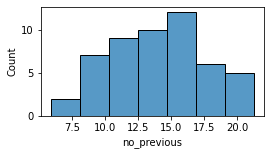

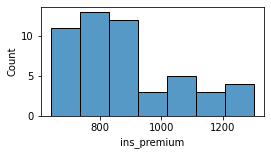

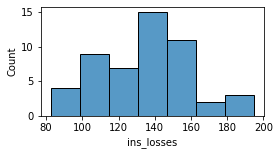

In [10]:
for col in df_num.columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(data=df, x=col)
    plt.show()

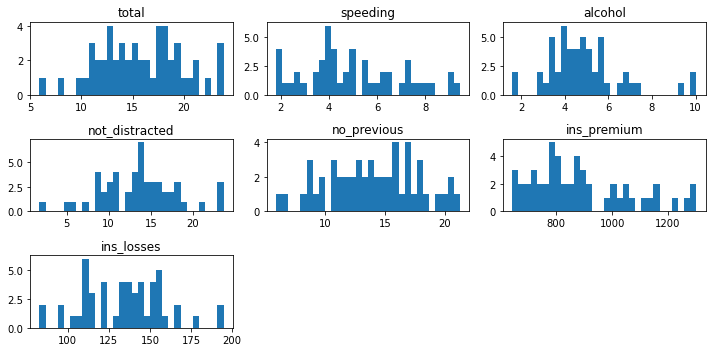

In [15]:
df_num.hist(figsize=(10, 5), grid=False, bins=30)
plt.tight_layout();

**Veja como esta a variação da coluna total com o boxplot**

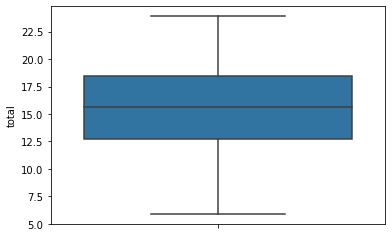

In [16]:
sns.boxplot(data=df, y='total');

**Veja como esta a variação de todas as colunas com variáveis númericas com o boxplot**

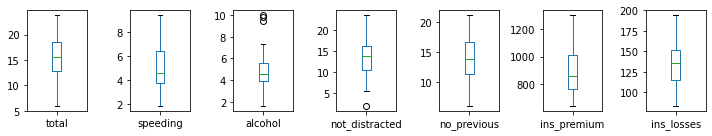

In [23]:
df_num.plot.box(subplots=True, figsize=(10, 2))
plt.tight_layout();

**Veja média, o maximo e argumento maximo dos `total`**

In [24]:
df['total'].mean()

15.79019607843137

In [25]:
df['total'].max()

23.9

In [53]:
df[df['total']==23.9]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC


In [26]:
df['total'].argmax()

34

In [27]:
df['total'].idxmax()

34

**Veja os dados do argumento maximo e informe o estado?**

In [56]:
df.loc[34, 'abbrev']

'ND'

In [57]:
df.iloc[34, -1]

'ND'

**Análise a variável `total` para cada estado (grafico barras)** 

In [29]:
df[['abbrev', 'total']].sort_values('total', ascending=False)

,abbrev,total
40,SC,23.9
34,ND,23.9
48,WV,23.8
3,AR,22.4
17,KY,21.4
26,MT,21.4
18,LA,20.5
36,OK,19.9
42,TN,19.5
43,TX,19.4


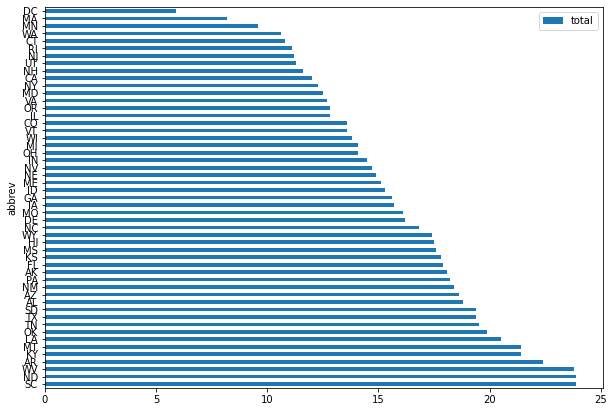

In [31]:
(df[['abbrev', 'total']]
    .sort_values('total', ascending=False)
    .set_index('abbrev')
    .plot.barh(figsize=(10, 7)))

In [44]:
abbrev_order = df[['abbrev',
                   'total']].sort_values('total')['abbrev'].tolist()

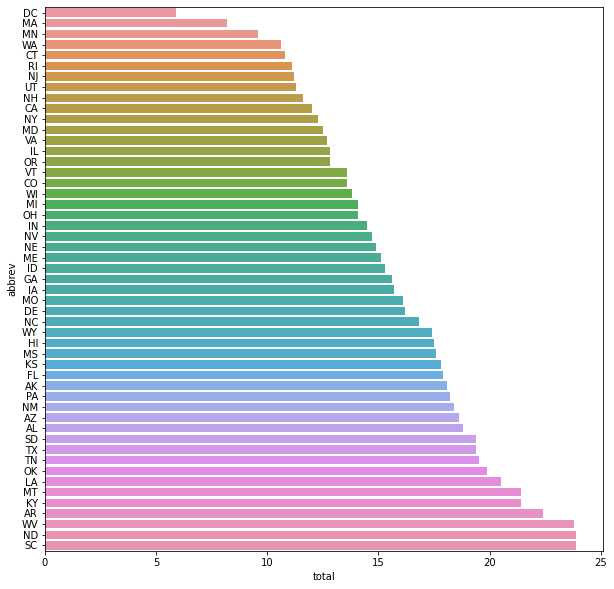

In [45]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df, y='abbrev', x='total', order=abbrev_order);

**Veja a corelação entre alcool e o total**

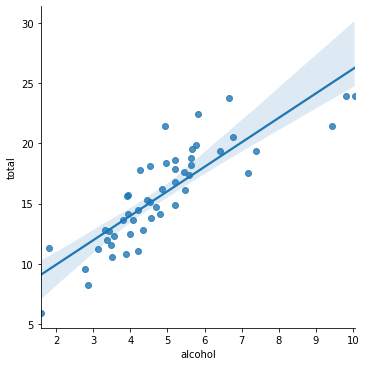

In [34]:
sns.lmplot(data=df, x='alcohol', y='total')

**Veja a correlação para todas combinações de variáveis numéricas**
Dica: pairplot

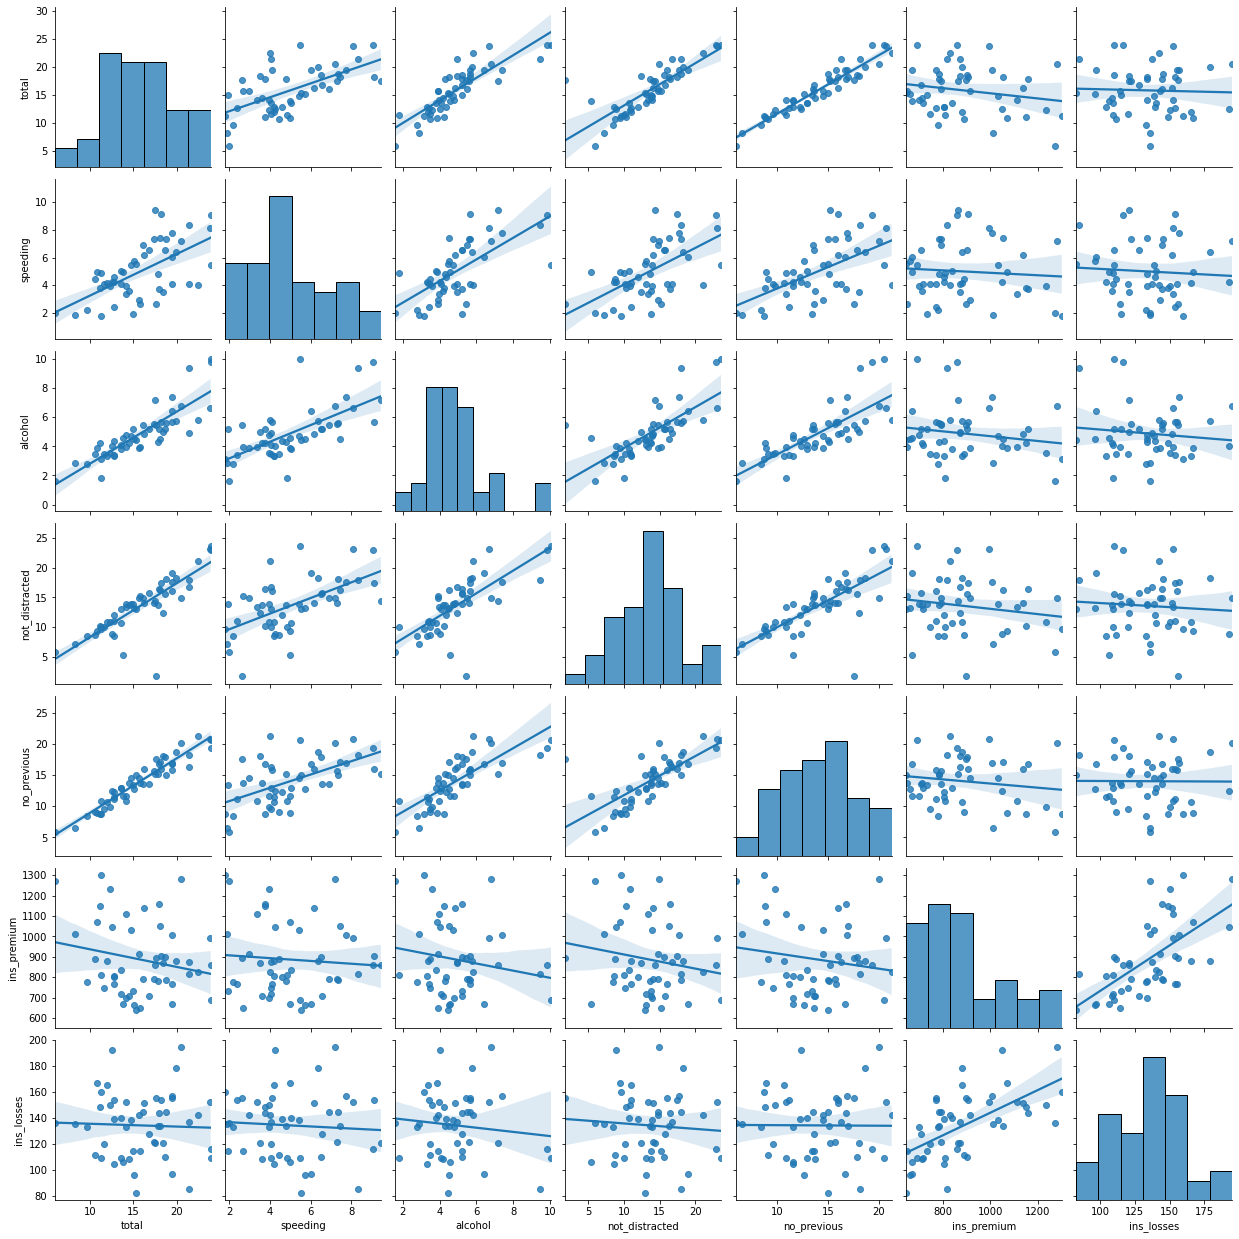

In [36]:
sns.pairplot(df_num, kind='reg');

**Veja a correlação para todos combinações de variáveis numéricas**
Agora use o heatmap

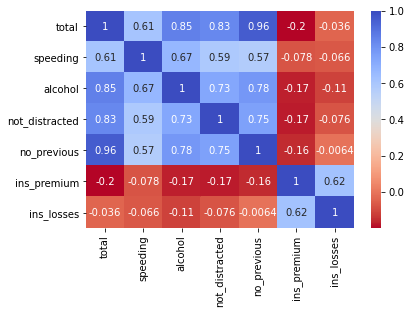

In [63]:
sns.heatmap(df.corr(), annot=True,  cmap='coolwarm_r');

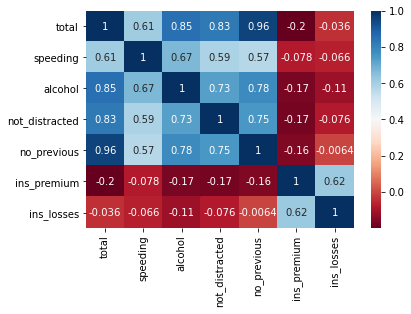

In [64]:
sns.heatmap(df.corr(), annot=True,  cmap='RdBu');

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

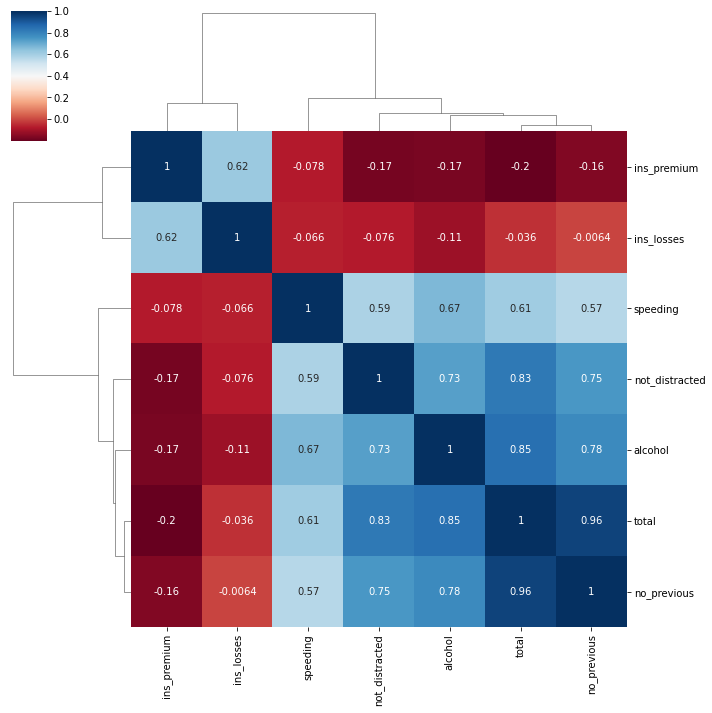

In [37]:
sns.clustermap(df.corr(), annot=True,  cmap='RdBu');

## Plots categoricos 

**Pegue os dados do titanic**

In [38]:
df = sns.load_dataset('titanic')

In [39]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
!pip install missingno

In [47]:
import missingno as msno

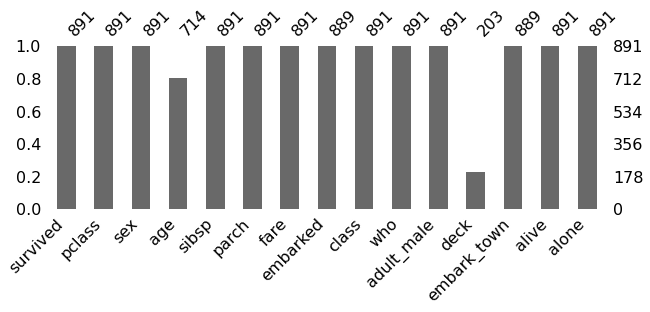

In [50]:
msno.bar(df, figsize=(10, 3))

In [42]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**verifique agora quantas pessoas exitem em cada classe** 

In [41]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

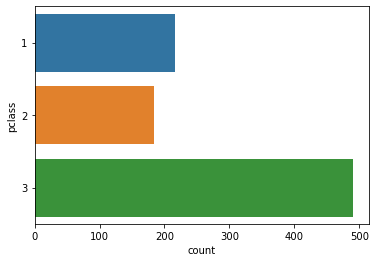

In [40]:
sns.countplot(data=df, y='pclass');

**quantas pessoas sobreviveram em de cada classe?**

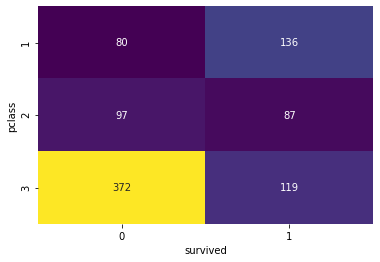

In [54]:
freq = pd.crosstab(df['pclass'], df['survived'])
sns.heatmap(freq, cmap='viridis', cbar=False, annot=True, fmt='.3g');

**Veja o histograma dos dados da idade dos usuarios**

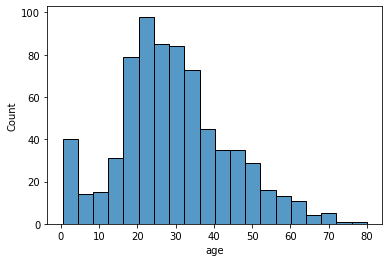

In [55]:
sns.histplot(data=df, x='age');

**Faça dois histogramas das idades, com as pessoas que sobreviveram e não sobreviveram**

In [ ]:
!pip install seaborn --upgrade

In [ ]:
!pip install seaborn==0.11.1

In [57]:
sns.__version__

'0.11.1'

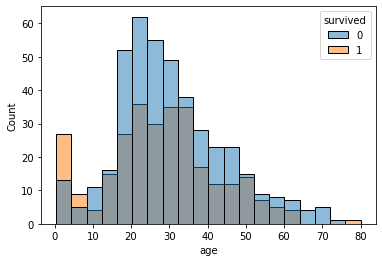

In [56]:
sns.histplot(data=df, x='age', hue='survived');